In [1]:
from notebook_utils import *

In [2]:
#Load RSA Results

rsa_summary = {}
for delay in [0,1,2,3,4]:
  rsa_summary[delay] = {}
  rsa_summary[delay][-1] = {'klz':[],'prz':[], 'p_vals':[]}
  for block in [1, 2]:
   rsa_summary[delay][block] = np.load('../rsa_results/'+str(block)+'rsa_results_all_brain_regions_'+str(delay)+'_none.npy').item()
   rsa_summary[delay][-1]['klz'].append(rsa_summary[delay][block]['klz'])
   rsa_summary[delay][-1]['prz'].append(rsa_summary[delay][block]['prz'])
   rsa_summary[delay][-1]['p_vals'].append(rsa_summary[delay][block]['p_vals'])
   rsa_summary[delay][-1]['labels_'] = rsa_summary[delay][block]['labels_']
    
  rsa_summary[delay][-1]['prz'] = np.mean(rsa_summary[delay][-1]['prz'], axis=0)
  rsa_summary[delay][-1]['klz'] = np.mean(rsa_summary[delay][-1]['klz'], axis=0)
  rsa_summary[delay][-1]['p_vals'] = np.mean(rsa_summary[delay][-1]['p_vals'], axis=0)

  

In [3]:
rsa_summary[delay][-1].keys()

dict_keys(['klz', 'prz', 'p_vals', 'labels_'])

BERT
(16, 16) 0.0007487890585867252
pvalue range: 0.0 0.05641016941522152 0.00926100125916638


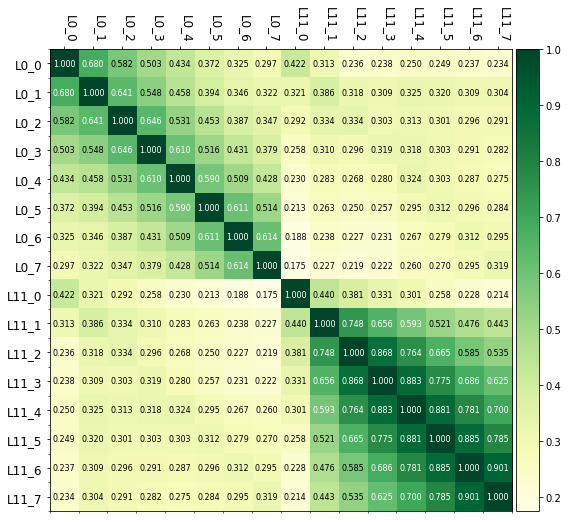

GoogleLM
(16, 16) 0.0001188789095253211
pvalue range: 0.0 0.00020830583173394668 3.0861869516858654e-06


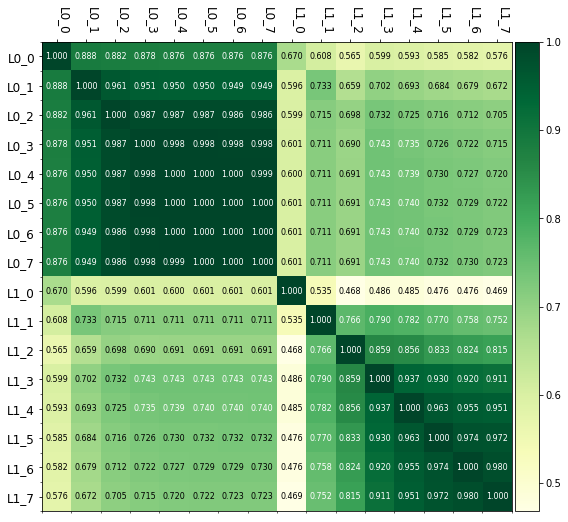

ELMO
(16, 16) 7.099169649186434e-05
pvalue range: 0.0 0.00014033722862604595 1.470805417277475e-06


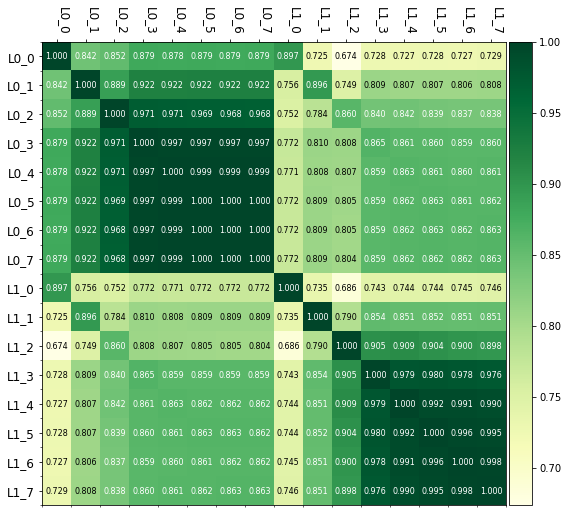

UniSentEnc
(8, 8) 0.0005083037497552333
pvalue range: 0.0 0.20422223421363464 0.0337373063893716


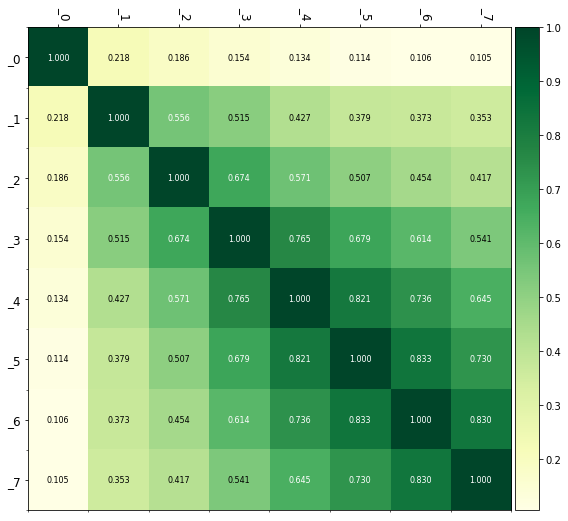

GloVe
(8, 8) 2.484117681779336e-06
pvalue range: 0.0 1.0257124720704677e-134 3.2053568629870183e-136


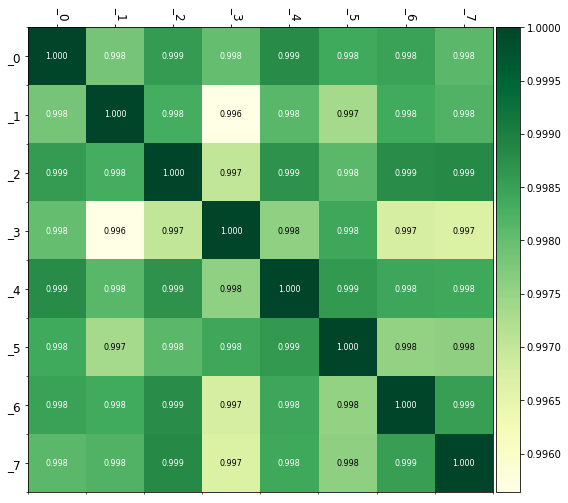

In [8]:
delay = 0
block = -1
blocks=[1,2]    


print("BERT")
selected_models = [0,2]
c_sizes = [0,1,2,3,4,5,6,7]
std = compute_std(selected_models, c_sizes, blocks, delay, mean_block_id=-1, key='prz', rsa_summary=rsa_summary)
print(std.shape, np.mean(std))
plot_heatmap(selected_models, c_sizes, 'bert_sim', delay=delay, block=block, summary_source=rsa_summary)

print("GoogleLM")
selected_models = [3,4]
c_sizes = [0,1,2,3,4,5,6,7]
std = compute_std(selected_models, c_sizes, blocks, delay, mean_block_id=-1, key='prz', rsa_summary=rsa_summary)
print(std.shape, np.mean(std))
plot_heatmap(selected_models, c_sizes, 'glm_sim', delay=delay, block=block, summary_source=rsa_summary)


print("ELMO")
selected_models = [5,6]
c_sizes = [0,1,2,3,4,5,6,7]
std = compute_std(selected_models, c_sizes, blocks, delay, mean_block_id=-1, key='prz', rsa_summary=rsa_summary)
print(std.shape, np.mean(std))
plot_heatmap(selected_models, c_sizes, 'elmo_sim', delay=delay, block=block, summary_source=rsa_summary)


print("UniSentEnc")
selected_models = [7]
c_sizes = [0,1,2,3,4,5,6,7]
std = compute_std(selected_models, c_sizes, blocks, delay, mean_block_id=-1, key='prz', rsa_summary=rsa_summary)
print(std.shape, np.mean(std))
plot_heatmap(selected_models, c_sizes, 'use_sim', delay=delay, block=block, summary_source=rsa_summary)


print("GloVe")
selected_models = [8]
c_sizes = [0,1,2,3,4,5,6,7]
std = compute_std(selected_models, c_sizes, blocks, delay, mean_block_id=-1, key='prz', rsa_summary=rsa_summary)
print(std.shape, np.mean(std))
plot_heatmap(selected_models, c_sizes, 'glove_sim', delay=delay, block=block, summary_source=rsa_summary)

In [7]:
print("BERT STD for different context sizes")
selected_models = [0,2]
for c_size in [0,1,2,3,4,5,6,7]:
    c_sizes = [c_size]
    std = compute_std(selected_models, c_sizes, blocks, delay, mean_block_id=-1, key='prz', rsa_summary=rsa_summary)
    print(std.shape, np.mean(std))

BERT STD for different context sizes
(2, 2) 0.00032792830956195057
(2, 2) 0.000749010297442586
(2, 2) 0.0005484984004473787
(2, 2) 0.0005696084948793312
(2, 2) 0.0005023447673559598
(2, 2) 0.00034356951148445457
(2, 2) 7.704994867358569e-05
(2, 2) 2.6744073852007744e-05


In [24]:
full_brain_rsa_summary = {}
for delay in [-5,-1,0,1,2,3,4]:
  full_brain_rsa_summary[delay] = np.load('../rsa_results/'+str(block)+'rsa_results_all_full_brain_'+str(delay)+'_none.npy').item()

In [30]:
delay = -1
block = 1
print("brains")
for area in np.arange(15):
  selected_models = [3,4,5,6,0,2,7,8,18,19]
  target_models = np.asarray([20,20,20,20,20,20,20,20,20,20])+area

  c_sizes_1 = [0,1,2,3,4,5,6,7]
  c_sizes_2 = [8,8,8,8,8,8,8,8]
  print_table(selected_models,target_models, c_sizes_1, c_sizes_2, 'brains', delay, block, rsa_summary)

brains
          0         1         2         3         4         5         6         7         8         9
0  0.291201  0.258904  0.237127  0.200977  0.203910  0.173927  0.169166  0.116790  0.375755  0.371755
1  0.301350  0.242786  0.249452  0.227284  0.195905  0.194847  0.149995  0.116823  0.375755  0.371755
2  0.301575  0.233053  0.255438  0.225843  0.205976  0.193552  0.141109  0.116672  0.375755  0.371755
3  0.300579  0.247424  0.256378  0.234916  0.199065  0.193734  0.145527  0.117448  0.375755  0.371755
4  0.299676  0.248512  0.256907  0.235647  0.198855  0.198958  0.137636  0.117239  0.375755  0.371755
5  0.299341  0.249992  0.256737  0.235000  0.199950  0.197266  0.136330  0.117310  0.375755  0.371755
6  0.299146  0.248111  0.256639  0.233494  0.197517  0.200812  0.139233  0.116564  0.375755  0.371755
7  0.299058  0.246499  0.256502  0.232906  0.188916  0.208533  0.125048  0.116529  0.375755  0.371755
          0         1         2         3         4         5         6    

In [34]:
delay = 10
block = 1
print("brains")
for area in np.arange(15):
  selected_models = [3,4,5,6,0,2,7,8,18,19]
  target_models = np.asarray([20,20,20,20,20,20,20,20,20,20])+area

  c_sizes_1 = [0,1,2,3,4,5,6,7]
  c_sizes_2 = [8,8,8,8,8,8,8,8]
  print_table(selected_models,target_models, c_sizes_1, c_sizes_2, 'brains', delay, block, rsa_summary)

brains
          0         1         2         3         4         5         6         7        8         9
0  0.302409  0.263646  0.248065  0.206545  0.205191  0.175498  0.169382  0.121751  0.38304  0.387079
1  0.314635  0.254175  0.267302  0.239315  0.196229  0.203899  0.144988  0.121910  0.38304  0.387079
2  0.311220  0.239955  0.268090  0.232004  0.210660  0.204549  0.129717  0.121616  0.38304  0.387079
3  0.310605  0.247453  0.269359  0.238906  0.199712  0.202042  0.122364  0.121997  0.38304  0.387079
4  0.309496  0.251240  0.269396  0.238102  0.198017  0.205258  0.121888  0.121870  0.38304  0.387079
5  0.309257  0.249483  0.268984  0.237068  0.193289  0.205955  0.126168  0.121902  0.38304  0.387079
6  0.309155  0.249485  0.268905  0.237336  0.202772  0.208163  0.125045  0.121743  0.38304  0.387079
7  0.309031  0.248317  0.268627  0.237123  0.197425  0.211774  0.108330  0.121828  0.38304  0.387079
          0         1         2         3         4         5         6         7   

In [36]:
delay = 5
block = 1
print("brains")
for area in np.arange(15):
  selected_models = [3,4,5,6,0,2,7,8,18,19]
  target_models = np.asarray([20,20,20,20,20,20,20,20,20,20])+area

  c_sizes_1 = [3]
  c_sizes_2 = [8]
  print_table(selected_models,target_models, c_sizes_1, c_sizes_2, 'brains', delay, block, rsa_summary)

brains
          0         1         2         3         4         5         6         7         8         9
3  0.309618  0.253532  0.273083  0.245349  0.208384  0.192764  0.137901  0.127747  0.384096  0.379329
          0         1         2         3         4         5         6         7         8         9
3  0.258548  0.202476  0.224738  0.194524  0.172574  0.157811  0.106034  0.106462  0.330826  0.322387
          0         1         2         3         4         5         6         7         8         9
3  0.279622  0.225058  0.247582  0.219544  0.185259  0.170952  0.118424  0.117276  0.347507  0.345668
          0         1         2         3         4         5         6        7         8         9
3  0.263761  0.198692  0.229076  0.194944  0.175432  0.159421  0.107919  0.10489  0.333975  0.338319
          0         1        2         3         4        5        6         7         8         9
3  0.297164  0.224901  0.25783  0.220641  0.191701  0.18033  0.11617  0.120466  

In [37]:
#Load RSA Results

full_rsa_summary = {}
for delay in [-5,-2,-1,0,1,2,3,4,5,10]:
  full_rsa_summary[delay] = {}
  full_rsa_summary[delay][-1] = {'klz':[],'prz':[], 'p_vals':[]}
  for block in [1]:
   full_rsa_summary[delay][block] = np.load('../rsa_results/'+str(block)+'rsa_results_all_full_brain_'+str(delay)+'_none.npy').item()
   full_rsa_summary[delay][-1]['klz'].append(full_rsa_summary[delay][block]['klz'])
   full_rsa_summary[delay][-1]['prz'].append(full_rsa_summary[delay][block]['prz'])
   full_rsa_summary[delay][-1]['p_vals'].append(full_rsa_summary[delay][block]['p_vals'])
   full_rsa_summary[delay][-1]['labels_'] = full_rsa_summary[delay][block]['labels_']
    
  full_rsa_summary[delay][-1]['prz'] = np.mean(full_rsa_summary[delay][-1]['prz'], axis=0)
  full_rsa_summary[delay][-1]['klz'] = np.mean(full_rsa_summary[delay][-1]['klz'], axis=0)
  full_rsa_summary[delay][-1]['p_vals'] = np.mean(full_rsa_summary[delay][-1]['p_vals'], axis=0)
  